<a href="https://colab.research.google.com/github/dhwanipatel14/Emotions-Detection-Model/blob/master/Eye_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


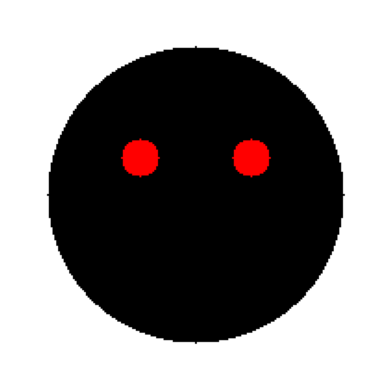

In [ ]:
# Create a synthetic dataset with a face and eyes
def create_synthetic_dataset():
    img_size = 200
    dataset = []

    for _ in range(100):
        img = np.ones((img_size, img_size, 3), dtype=np.uint8) * 255

        # Draw a face
        cv2.circle(img, (img_size // 2, img_size // 2), 80, (0, 0, 0), -1)

        # Draw left eye
        cv2.circle(img, (img_size // 2 - 30, img_size // 2 - 20), 10, (0, 0, 255), -1)

        # Draw right eye
        cv2.circle(img, (img_size // 2 + 30, img_size // 2 - 20), 10, (0, 0, 255), -1)

        dataset.append(img)

    return dataset

# Display a sample image from the dataset
sample_image = create_synthetic_dataset()[0]
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [2]:
from google.colab.patches import cv2_imshow
import cv2
import dlib
import numpy as np
from datetime import datetime, timedelta

# Install required packages
!pip install dlib

# Load the shape predictor model
!wget "http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2"
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

# Function to detect eyes in a frame
def detect_eyes(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    if faces:
        shape = predictor(gray, faces[0])
        left_eye = shape.parts()[36:42]
        right_eye = shape.parts()[42:48]
        return left_eye, right_eye
    else:
        return None, None

# Function to calculate Eye Aspect Ratio (EAR)
def calculate_ear(eye):
    eye = np.array([(point.x, point.y) for point in eye])
    A = np.linalg.norm(eye[1] - eye[5])
    B = np.linalg.norm(eye[2] - eye[4])
    C = np.linalg.norm(eye[0] - eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

# Initialize video capture (replace with your video file path)
video_path = "/content/WIN_20231130_17_43_08_Pro.mp4"  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

# Get video properties for the output video
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Initialize video writer for the output video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('/content/output_video.avi', fourcc, fps, (width, height))

# Initialize dlib face detector
detector = dlib.get_frontal_face_detector()

while True:
    ret, frame = cap.read()

    if not ret:
        break

    left_eye, right_eye = detect_eyes(frame)

    if left_eye is not None and right_eye is not None:
        ear_left = calculate_ear(left_eye)
        ear_right = calculate_ear(right_eye)

        # Calculate the average EAR for both eyes
        avg_ear = (ear_left + ear_right) / 2.0

        # Set a threshold for distraction detection (you may need to adjust this)
        distraction_threshold = 0.2

        # Check if the person is distracted
        if avg_ear < distraction_threshold:
            if distracted_start_time is None:
                distracted_start_time = datetime.now()
            distracted_duration = datetime.now() - distracted_start_time

            if distracted_duration.total_seconds() >= distracted_duration_threshold and not distraction_recorded:
                print(f"The person was distracted for {distracted_duration_threshold} seconds.")
                distraction_recorded = True
        else:
            distracted_start_time = None
            distraction_recorded = False

        # Draw contours around eyes
        for eye in [left_eye, right_eye]:
            for point in eye:
                x, y = point.x, point.y
                cv2.circle(frame, (x, y), 3, (0, 255, 0), -1)

        # Display directional information
        cv2.putText(frame, "Looking Straight", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    output_video.write(frame)  # Write the frame to the output video

    cv2_imshow(frame)  # Use cv2_imshow instead of cv2.imshow

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object, video writer, and close all windows
cap.release()
output_video.release()
cv2.destroyAllWindows()


ERROR: Operation cancelled by user
--2023-12-03 19:04:13--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  81.2MB/s    in 0.8s    

2023-12-03 19:04:14 (81.2 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.
